In [5]:
import mne
import numpy as np
from scipy.stats import entropy, skew, kurtosis

# Load the EEG data in EDF format
raw = mne.io.read_raw_edf('chb01_42.edf', preload=True)
raw.load_data()

# Preprocess the data by applying a bandpass filter and re-referencing to the average
raw.filter(1, 40)
raw.set_eeg_reference('average')

# Define the frequency bands of interest for feature extraction
freq_bands = {'alpha': [8, 13], 'beta': [13, 30], 'gamma': [30, 40]}

# Select EEG channels
eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)

# Extract features for each frequency band
features = {}
for band, freq_range in freq_bands.items():
    freq_mask = (raw.info['sfreq'] >= freq_range[0]) & (raw.info['sfreq'] <= freq_range[1])
    band_power = np.mean(np.abs(raw.get_data()[eeg_picks][:, freq_mask]) ** 2, axis=1)
    features[band + '_power'] = band_power
    features[band + '_entropy'] = entropy(np.abs(raw.get_data()[eeg_picks][:, freq_mask]) ** 2, axis=1)
    features[band + '_skewness'] = skew(raw.get_data()[eeg_picks][:, freq_mask], axis=1)
    features[band + '_kurtosis'] = kurtosis(raw.get_data()[eeg_picks][:, freq_mask], axis=1)

# Print the extracted features
for feature, value in features.items():
    print(f"{feature}: {value}")


Extracting EDF parameters from g:\CDSS\Final Project\chb01_42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Mariam\AppData\Local\Temp\ipykernel_3216\1857988085.py:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('chb01_42.edf', preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


alpha_power: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
alpha_entropy: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
alpha_skewness: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
alpha_kurtosis: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
beta_power: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
beta

In [6]:
import numpy as np
from scipy.stats import entropy, skew, kurtosis

# Load the EEG data in EDF format
raw = mne.io.read_raw_edf('chb01_01.edf', preload=True)  # Replace with the appropriate file name
raw.load_data()

# Preprocess the data by applying a bandpass filter and re-referencing to the average
raw.filter(1, 120)
raw.set_eeg_reference('average')

# Define the frequency bands of interest for feature extraction
freq_bands = {'alpha': [8, 13], 'beta': [13, 30], 'gamma': [30, 50]}  # Update with the appropriate frequency ranges

# Select EEG channels
eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)

# Extract features for each frequency band
features = {}
for band, freq_range in freq_bands.items():
    band_data = raw.get_data()[eeg_picks]
    print(f"Band: {band}")
    print(f"Data shape: {band_data.shape}")
    print(f"Data: {band_data}")

    freq_mask = (raw.info['sfreq'] >= freq_range[0]) & (raw.info['sfreq'] <= freq_range[1])
    band_data = band_data[:, freq_mask]

    band_power = np.mean(np.abs(band_data) ** 2, axis=1)
    print(f"Band power: {band_power}")

    band_entropy = entropy(np.abs(band_data) ** 2, axis=1)
    print(f"Band entropy: {band_entropy}")

    band_skewness = skew(band_data, axis=1)
    print(f"Band skewness: {band_skewness}")

    band_kurtosis = kurtosis(band_data, axis=1)
    print(f"Band kurtosis: {band_kurtosis}")

    features[band + '_power'] = band_power
    features[band + '_entropy'] = band_entropy
    features[band + '_skewness'] = band_skewness
    features[band + '_kurtosis'] = band_kurtosis

# Print the extracted features
for feature, value in features.items():
    print(f"{feature}: {value}")

Extracting EDF parameters from g:\CDSS\Final Project\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Mariam\AppData\Local\Temp\ipykernel_3216\3384149147.py:5: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('chb01_01.edf', preload=True)  # Replace with the appropriate file name


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


Band: alpha
Data shape: (23, 921600)
Data: [[ 2.13323406e-20  1.01787131e-04  1.00919785e-04 ... -2.79044304e-05
  -2.11245457e-05  1.88925175e-20]
 [-4.07864778e-21  6.06664979e-05  6.00212593e-05 ... -3.84971920e-06
  -1.92017357e-06 -3.97737210e-21]
 [-1.67841420e-20 -4.77575272e-07 -4.52873157e-07 ...  1.72613084e-05
   1.17771164e-05 -4.82440505e-21]
 ...
 [-5.32065587e-20  2.19550856e-04  2.17735507e-04 ...  3.27781744e-05
   1.44174713e-05 -1.43627326e-21]
 [-2.18663397e-20 -1.36827337e-04 -1.35539576e-04 ...  8.75448453e-06
   3.98289071e-06  1.95185853e-21]
 [-2.38458188e-21 -8.71998678e-05 -8.63543423e-05 ... -6.20318695e-06
  -2.71194698e-06 -5.03616328e-21]]
Band power: [[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
Band entropy: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.

Extracting EDF parameters from g:\CDSS\Final Project\chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Mariam\AppData\Local\Temp\ipykernel_11484\1738359951.py:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('chb01_04.edf', preload=True)  # Replace with the appropriate file name


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)


C:\Users\Mariam\AppData\Local\Temp\ipykernel_11484\1738359951.py:12: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=0, fmax=100)
C:\Users\Mariam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


No data available for alpha band.
No data available for beta band.
No data available for gamma band.


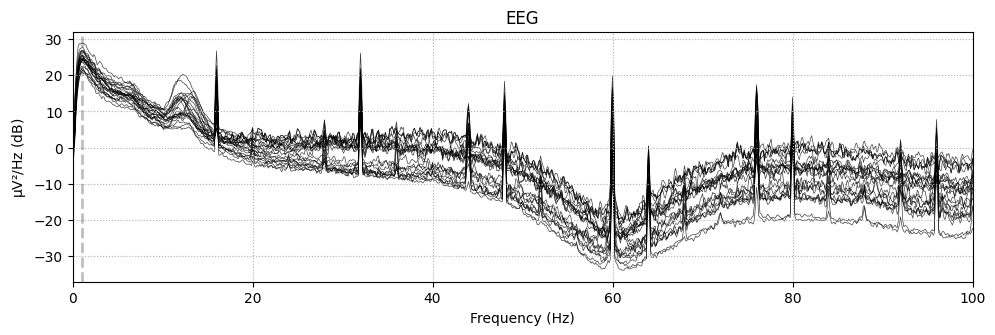

In [2]:
import mne
import numpy as np
from scipy.stats import entropy, skew, kurtosis

# Load the EEG data in EDF format
raw = mne.io.read_raw_edf('chb01_04.edf', preload=True)  # Replace with the appropriate file name
raw.load_data()

# Preprocess the data by applying a bandpass filter and re-referencing to the average
raw.filter(1, 120)
raw.set_eeg_reference('average')
raw.plot_psd(fmin=0, fmax=100)


# Define the frequency bands of interest for feature extraction
freq_bands = {'alpha': [8, 13], 'beta': [13, 30], 'gamma': [30, 50]}  # Update with the appropriate frequency ranges

# Select EEG channels
eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)

# Extract features for each frequency band
features = {}
for band, freq_range in freq_bands.items():
    band_data = raw.get_data()[eeg_picks]

    freq_mask = (raw.info['sfreq'] >= freq_range[0]) & (raw.info['sfreq'] <= freq_range[1])
    band_data = band_data[:, freq_mask]

    if band_data.size == 0:
        print(f"No data available for {band} band.")
        continue

    band_power = np.mean(np.abs(band_data) ** 2, axis=1)
    band_entropy = entropy(np.abs(band_data) ** 2, axis=1)
    band_skewness = skew(band_data, axis=1)
    band_kurtosis = kurtosis(band_data, axis=1)

    features[band + '_power'] = band_power
    features[band + '_entropy'] = band_entropy
    features[band + '_skewness'] = band_skewness
    features[band + '_kurtosis'] = band_kurtosis

# Print the extracted features
for feature, value in features.items():
    print(f"{feature}: {value}")

    


In [6]:
import mne
import numpy as np
from scipy.stats import entropy, skew, kurtosis

# Load the EEG data in EDF format
raw = mne.io.read_raw_edf('chb01_04.edf', preload=True)  # Replace with the appropriate file name
raw.load_data()

# Preprocess the data by applying a bandpass filter and re-referencing to the average
raw.filter(1, 120)
raw.set_eeg_reference('average')


# Define the frequency bands of interest for feature extraction
# freq_bands = {'alpha': [8, 13], 'beta': [13, 30], 'gamma': [30, 50]}  # Update with the appropriate frequency ranges
freq_bands = {'delta': [0.5,4], 'theta': [4,7], 'alpha': [7,15], 'beta': [15, 30]}

# Select EEG channels
eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)

# Extract features for each frequency band
features = {}
for band, freq_range in freq_bands.items():
    print(f"Processing band: {band}")
    print(f"Frequency range: {freq_range} Hz")

    # Apply bandpass filter within the frequency range
    band_data = raw.copy().filter(freq_range[0], freq_range[1], picks=eeg_picks).get_data()
    print(f"Data Shape: {band_data.shape}") # type: ignore

    if np.isnan(band_data).any():
        print(f"No data available for {band} band.")
        continue

    band_power = np.mean(np.abs(band_data) ** 2, axis=1)
    
    band_entropy = entropy(np.abs(band_data) ** 2, axis=1)

    band_skewness = skew(band_data, axis=1)

    band_kurtosis = kurtosis(band_data, axis=1)

    band_mean=np.mean(band_data,axis=-1)
    
    band_std = np.std(band_data,axis=-1)

    band_ptp = np.ptp(band_data,axis=-1)

    band_var = np.var(band_data,axis=-1)

    band_min = np.min(band_data,axis=-1)

    band_max = np.max(band_data,axis=-1)

    band_argmin = np.argmin(band_data,axis=-1)

    band_argmax = np.argmax(band_data,axis=-1)

    band_rms= np.sqrt(np.mean(band_data ** 2,axis=-1))  #root mean sqaured #type: ignore

    for suffix, value in zip(['power', 'entropy', 'skewness', 'kurtosis', 'mean', 'std', 'ptp', 'var',
                              'min', 'max', 'argmin', 'argmax', 'rms'], [band_power, band_entropy,
                                                                         band_skewness, band_kurtosis,
                                                                         band_mean, band_std,
                                                                         band_ptp, band_var, band_min,
                                                                         band_max, band_argmin,
                                                                         band_argmax, band_rms]):
        features[band + '_' + suffix] = value


# Print the extracted features
for feature, value in features.items():
    print(f"{feature}: {value}")


def concatenate_features(band_data):
    return np.concatenate((band_power,band_entropy,band_skewness,band_kurtosis,band_mean,band_std,band_max,band_argmin,band_argmax,band_rms)
                           ,axis=-1)
features_to_model=list(features)
print(concatenate_features)

Extracting EDF parameters from g:\CDSS\Final Project\chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Mariam\AppData\Local\Temp\ipykernel_11484\4119244208.py:6: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf('chb01_04.edf', preload=True)  # Replace with the appropriate file name


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
Processing band: theta
Frequency range: [4, 7] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 8.00 Hz)
- Filter length: 423 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
Processing band: alpha
Frequency range: [7, 15] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 15 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 15.00 Hz
- Upper transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 16.88 Hz)
- Filter length: 423 samples (1.652 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


Data Shape: (23, 921600)
Processing band: beta
Frequency range: [15, 30] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 15 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 15.00
- Lower transition bandwidth: 3.75 Hz (-6 dB cutoff frequency: 13.12 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 227 samples (0.887 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished


Data Shape: (23, 921600)
delta_power: [6.33826307e-10 3.47354330e-10 2.61319893e-10 2.78078295e-10
 9.55295233e-10 4.76222645e-10 2.17830814e-10 4.57094511e-10
 8.23254112e-10 5.35020683e-10 2.78627649e-10 8.09408138e-10
 6.17285830e-10 5.61194070e-10 5.17989878e-10 1.00332248e-09
 6.62428908e-10 6.07795392e-10 7.90627633e-10 4.79335806e-10
 1.64020773e-09 4.67108225e-10 5.17989878e-10]
delta_entropy: [11.6216479  12.08065547 12.50852282 12.54637546 12.1521689  12.53773601
 12.54260995 12.60630696 12.1543922  12.25373215 12.40615855 12.43307606
 12.0363122  11.87805052 12.38585582 12.12384983 12.43183126 12.48935988
 12.51336292 12.54273026 11.69989796 11.63121143 12.38585582]
delta_skewness: [ 1.43624343  0.11943777  0.07796855 -0.12241024  0.69221052 -0.0445342
  0.09703934 -0.16307896  0.47078404 -0.22598419 -0.00719193 -0.17707882
  0.67252191 -0.14698137 -0.10888072 -0.0511294  -0.11139723  0.1367164
 -0.16933457 -0.14677421 -0.13995237  0.62638408 -0.10888072]
delta_kurtosis: [34

In [1]:
# raw.plot_psd(fmin=0, fmax=100)


NameError: name 'raw' is not defined

In [16]:
import mne
import os
from   mne.time_frequency import psd_array_multitaper
import numpy as np
from scipy.stats import entropy, skew, kurtosis
# Iterate over each EDF file in a directory
directory = 'Modeltraning\CH08'
for filename in os.listdir(directory):
    if filename.endswith('.edf'):
        # Load the EEG data in EDF format
        filepath = os.path.join(directory, filename)
        raw = mne.io.read_raw_edf(filepath,preload=True)

        # Preprocess the data by applying a bandpass filter and re-referencing to the average
        raw.filter(1, 120)
        raw.set_eeg_reference('average')
            
        # Define the frequency bands of interest for feature extraction
        freq_bands = {'delta': [0.5,4], 'theta': [4,7], 'alpha': [7,15], 'beta': [15, 30]}

        # Select EEG channels
        eeg_picks = mne.pick_types(raw.info, meg=False, eeg=True)


        # Compute the power spectral density for each frequency band using the Welch method
        psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore

        # Extract the power values for each frequency band
        spectral_features = []

        for band, freq_range in freq_bands.items():
            print(f"Processing band: {band}")
            print(f"Frequency range: {freq_range} Hz")

            # Apply bandpass filter within the frequency range
            
            freq_mask = (raw.info['sfreq'] >= freq_range[0]) & (raw.info['sfreq'] <= freq_range[1])
            band_data = raw.copy().filter(freq_range[0], freq_range[1], picks=eeg_picks).get_data()
            print(f"Data Shape: {band_data.shape}") # type: ignore

            if np.isnan(band_data).any():
                print(f"No data available for {band} band.")
                continue
            band_power = np.mean(np.abs(band_data) ** 2, axis=1)
            band_entropy = entropy(np.abs(band_data) ** 2, axis=1)

            band_skewness = skew(band_data, axis=1)
            spectral_features.append(band_power) # type: ignore
            spectral_features.append(band_entropy)
            spectral_features.append(band_skewness)
            print(spectral_features)
            

Extracting EDF parameters from g:\CDSS\Final Project\Modeltraning\CH08\chb08_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


Data Shape: (23, 921600)
[array([4.49790094e-09, 2.79220655e-09, 1.58431877e-09, 2.43888997e-09,
       2.82373802e-09, 1.19164377e-09, 1.37155972e-09, 2.35995163e-09,
       4.71550826e-09, 1.21601755e-09, 1.43634253e-09, 3.31965674e-09,
       5.30896969e-09, 2.12311637e-09, 2.45290081e-09, 3.27330066e-09,
       1.24195848e-09, 1.40280244e-09, 1.91209354e-09, 1.09669302e-09,
       5.41978647e-09, 2.36933082e-09, 2.45290081e-09]), array([11.87672699, 12.14428375, 11.73717385, 11.94756631, 12.00842363,
       12.2274642 , 11.71394183, 12.05461306, 11.78950569, 11.80809017,
       11.35596296, 12.11839462, 11.72034096, 12.0132153 , 11.75935106,
       11.92933966, 11.89720286, 12.0155131 , 12.07177657, 12.22773287,
       11.95027623, 11.57815733, 11.75935106]), array([ 0.52270784,  0.16274615, -0.49600625,  0.04654673,  0.77037222,
        0.04621219,  0.66134824, -0.27155646,  1.05542099,  0.11716541,
       -1.35465588,  0.04329837,  1.07259878,  0.0050311 , -0.07525916,
       -0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([4.49790094e-09, 2.79220655e-09, 1.58431877e-09, 2.43888997e-09,
       2.82373802e-09, 1.19164377e-09, 1.37155972e-09, 2.35995163e-09,
       4.71550826e-09, 1.21601755e-09, 1.43634253e-09, 3.31965674e-09,
       5.30896969e-09, 2.12311637e-09, 2.45290081e-09, 3.27330066e-09,
       1.24195848e-09, 1.40280244e-09, 1.91209354e-09, 1.09669302e-09,
       5.41978647e-09, 2.36933082e-09, 2.45290081e-09]), array([11.87672699, 12.14428375, 11.73717385, 11.94756631, 12.00842363,
       12.2274642 , 11.71394183, 12.05461306, 11.78950569, 11.80809017,
       11.35596296, 12.11839462, 11.72034096, 12.0132153 , 11.75935106,
       11.92933966, 11.89720286, 12.0155131 , 12.07177657, 12.22773287,
       11.95027623, 11.57815733, 11.75935106]), array([ 0.52270784,  0.16274615, -0.49600625,  0.04654673,  0.77037222,
        0.04621219,  0.66134824, -0.27155646,  1.05542099,  0.11716541,
       -1.35465588,  0.04329837,  1.07259878,  0.0050311 , -0.07525916,
       -0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([4.49790094e-09, 2.79220655e-09, 1.58431877e-09, 2.43888997e-09,
       2.82373802e-09, 1.19164377e-09, 1.37155972e-09, 2.35995163e-09,
       4.71550826e-09, 1.21601755e-09, 1.43634253e-09, 3.31965674e-09,
       5.30896969e-09, 2.12311637e-09, 2.45290081e-09, 3.27330066e-09,
       1.24195848e-09, 1.40280244e-09, 1.91209354e-09, 1.09669302e-09,
       5.41978647e-09, 2.36933082e-09, 2.45290081e-09]), array([11.87672699, 12.14428375, 11.73717385, 11.94756631, 12.00842363,
       12.2274642 , 11.71394183, 12.05461306, 11.78950569, 11.80809017,
       11.35596296, 12.11839462, 11.72034096, 12.0132153 , 11.75935106,
       11.92933966, 11.89720286, 12.0155131 , 12.07177657, 12.22773287,
       11.95027623, 11.57815733, 11.75935106]), array([ 0.52270784,  0.16274615, -0.49600625,  0.04654673,  0.77037222,
        0.04621219,  0.66134824, -0.27155646,  1.05542099,  0.11716541,
       -1.35465588,  0.04329837,  1.07259878,  0.0050311 , -0.07525916,
       -0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.6s finished


Data Shape: (23, 921600)
[array([4.49790094e-09, 2.79220655e-09, 1.58431877e-09, 2.43888997e-09,
       2.82373802e-09, 1.19164377e-09, 1.37155972e-09, 2.35995163e-09,
       4.71550826e-09, 1.21601755e-09, 1.43634253e-09, 3.31965674e-09,
       5.30896969e-09, 2.12311637e-09, 2.45290081e-09, 3.27330066e-09,
       1.24195848e-09, 1.40280244e-09, 1.91209354e-09, 1.09669302e-09,
       5.41978647e-09, 2.36933082e-09, 2.45290081e-09]), array([11.87672699, 12.14428375, 11.73717385, 11.94756631, 12.00842363,
       12.2274642 , 11.71394183, 12.05461306, 11.78950569, 11.80809017,
       11.35596296, 12.11839462, 11.72034096, 12.0132153 , 11.75935106,
       11.92933966, 11.89720286, 12.0155131 , 12.07177657, 12.22773287,
       11.95027623, 11.57815733, 11.75935106]), array([ 0.52270784,  0.16274615, -0.49600625,  0.04654673,  0.77037222,
        0.04621219,  0.66134824, -0.27155646,  1.05542099,  0.11716541,
       -1.35465588,  0.04329837,  1.07259878,  0.0050311 , -0.07525916,
       -0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.5s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished


Data Shape: (23, 921600)
[array([1.56653155e-09, 2.38362261e-09, 1.99237036e-09, 4.54667571e-09,
       1.65438019e-09, 1.68414824e-09, 1.28419134e-09, 3.80781833e-09,
       1.36037950e-09, 1.01855944e-09, 7.79732387e-10, 3.41449575e-09,
       6.50700160e-10, 1.05762487e-09, 2.13147742e-09, 3.13083035e-09,
       1.77011296e-09, 1.46112115e-09, 3.50649967e-09, 1.44148588e-09,
       3.20365540e-09, 8.54831281e-10, 2.13147742e-09]), array([12.57911403, 12.68672278, 12.40581301, 12.47236918, 12.75650078,
       12.74562256, 12.61114169, 12.51261938, 12.67465187, 12.6847459 ,
       12.60091841, 12.67364283, 12.62038869, 12.6980856 , 12.64049186,
       12.63765081, 12.58132617, 12.70062509, 12.54737525, 12.74801706,
       12.72550705, 12.70013108, 12.64049186]), array([ 0.00931376,  0.24402412,  0.33071226,  0.12808637,  0.00179148,
       -0.00692888,  0.21961758,  0.40189366,  0.11110966, -0.18488647,
        0.17886377,  0.13905778,  0.05072622,  0.11412906,  0.09499088,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.6s finished


Data Shape: (23, 921600)
[array([1.56653155e-09, 2.38362261e-09, 1.99237036e-09, 4.54667571e-09,
       1.65438019e-09, 1.68414824e-09, 1.28419134e-09, 3.80781833e-09,
       1.36037950e-09, 1.01855944e-09, 7.79732387e-10, 3.41449575e-09,
       6.50700160e-10, 1.05762487e-09, 2.13147742e-09, 3.13083035e-09,
       1.77011296e-09, 1.46112115e-09, 3.50649967e-09, 1.44148588e-09,
       3.20365540e-09, 8.54831281e-10, 2.13147742e-09]), array([12.57911403, 12.68672278, 12.40581301, 12.47236918, 12.75650078,
       12.74562256, 12.61114169, 12.51261938, 12.67465187, 12.6847459 ,
       12.60091841, 12.67364283, 12.62038869, 12.6980856 , 12.64049186,
       12.63765081, 12.58132617, 12.70062509, 12.54737525, 12.74801706,
       12.72550705, 12.70013108, 12.64049186]), array([ 0.00931376,  0.24402412,  0.33071226,  0.12808637,  0.00179148,
       -0.00692888,  0.21961758,  0.40189366,  0.11110966, -0.18488647,
        0.17886377,  0.13905778,  0.05072622,  0.11412906,  0.09499088,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([1.56653155e-09, 2.38362261e-09, 1.99237036e-09, 4.54667571e-09,
       1.65438019e-09, 1.68414824e-09, 1.28419134e-09, 3.80781833e-09,
       1.36037950e-09, 1.01855944e-09, 7.79732387e-10, 3.41449575e-09,
       6.50700160e-10, 1.05762487e-09, 2.13147742e-09, 3.13083035e-09,
       1.77011296e-09, 1.46112115e-09, 3.50649967e-09, 1.44148588e-09,
       3.20365540e-09, 8.54831281e-10, 2.13147742e-09]), array([12.57911403, 12.68672278, 12.40581301, 12.47236918, 12.75650078,
       12.74562256, 12.61114169, 12.51261938, 12.67465187, 12.6847459 ,
       12.60091841, 12.67364283, 12.62038869, 12.6980856 , 12.64049186,
       12.63765081, 12.58132617, 12.70062509, 12.54737525, 12.74801706,
       12.72550705, 12.70013108, 12.64049186]), array([ 0.00931376,  0.24402412,  0.33071226,  0.12808637,  0.00179148,
       -0.00692888,  0.21961758,  0.40189366,  0.11110966, -0.18488647,
        0.17886377,  0.13905778,  0.05072622,  0.11412906,  0.09499088,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.4s finished


Data Shape: (23, 921600)
[array([1.56653155e-09, 2.38362261e-09, 1.99237036e-09, 4.54667571e-09,
       1.65438019e-09, 1.68414824e-09, 1.28419134e-09, 3.80781833e-09,
       1.36037950e-09, 1.01855944e-09, 7.79732387e-10, 3.41449575e-09,
       6.50700160e-10, 1.05762487e-09, 2.13147742e-09, 3.13083035e-09,
       1.77011296e-09, 1.46112115e-09, 3.50649967e-09, 1.44148588e-09,
       3.20365540e-09, 8.54831281e-10, 2.13147742e-09]), array([12.57911403, 12.68672278, 12.40581301, 12.47236918, 12.75650078,
       12.74562256, 12.61114169, 12.51261938, 12.67465187, 12.6847459 ,
       12.60091841, 12.67364283, 12.62038869, 12.6980856 , 12.64049186,
       12.63765081, 12.58132617, 12.70062509, 12.54737525, 12.74801706,
       12.72550705, 12.70013108, 12.64049186]), array([ 0.00931376,  0.24402412,  0.33071226,  0.12808637,  0.00179148,
       -0.00692888,  0.21961758,  0.40189366,  0.11110966, -0.18488647,
        0.17886377,  0.13905778,  0.05072622,  0.11412906,  0.09499088,
        0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished


Data Shape: (23, 921600)
[array([1.14921792e-09, 1.92693902e-09, 2.20833576e-09, 4.20175728e-09,
       1.40935641e-09, 1.30516360e-09, 1.22758188e-09, 3.42850762e-09,
       1.23402397e-09, 8.34953521e-10, 5.82173276e-10, 2.96498697e-09,
       5.99683460e-10, 7.46537169e-10, 1.53872250e-09, 2.69519255e-09,
       1.59644983e-09, 1.22876892e-09, 3.46118066e-09, 1.09256995e-09,
       2.00514238e-09, 7.16690991e-10, 1.53872250e-09]), array([12.35815854, 12.48767895, 12.11780126, 12.29899436, 12.55517015,
       12.63329267, 12.53600428, 12.40780048, 12.5735858 , 12.66326518,
       12.60936744, 12.69375237, 12.42067722, 12.64684464, 12.65249327,
       12.64340726, 12.56974754, 12.69294723, 12.33617837, 12.47317642,
       12.60186612, 12.63713627, 12.65249327]), array([ 0.13710039,  0.13303636,  0.58815889,  0.27848168,  0.03106653,
       -0.01558344,  0.19905568,  0.68770796,  0.12680432, -0.16563353,
        0.0620678 ,  0.21163134,  0.60108748, -0.09876486,  0.20749162,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([1.14921792e-09, 1.92693902e-09, 2.20833576e-09, 4.20175728e-09,
       1.40935641e-09, 1.30516360e-09, 1.22758188e-09, 3.42850762e-09,
       1.23402397e-09, 8.34953521e-10, 5.82173276e-10, 2.96498697e-09,
       5.99683460e-10, 7.46537169e-10, 1.53872250e-09, 2.69519255e-09,
       1.59644983e-09, 1.22876892e-09, 3.46118066e-09, 1.09256995e-09,
       2.00514238e-09, 7.16690991e-10, 1.53872250e-09]), array([12.35815854, 12.48767895, 12.11780126, 12.29899436, 12.55517015,
       12.63329267, 12.53600428, 12.40780048, 12.5735858 , 12.66326518,
       12.60936744, 12.69375237, 12.42067722, 12.64684464, 12.65249327,
       12.64340726, 12.56974754, 12.69294723, 12.33617837, 12.47317642,
       12.60186612, 12.63713627, 12.65249327]), array([ 0.13710039,  0.13303636,  0.58815889,  0.27848168,  0.03106653,
       -0.01558344,  0.19905568,  0.68770796,  0.12680432, -0.16563353,
        0.0620678 ,  0.21163134,  0.60108748, -0.09876486,  0.20749162,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([1.14921792e-09, 1.92693902e-09, 2.20833576e-09, 4.20175728e-09,
       1.40935641e-09, 1.30516360e-09, 1.22758188e-09, 3.42850762e-09,
       1.23402397e-09, 8.34953521e-10, 5.82173276e-10, 2.96498697e-09,
       5.99683460e-10, 7.46537169e-10, 1.53872250e-09, 2.69519255e-09,
       1.59644983e-09, 1.22876892e-09, 3.46118066e-09, 1.09256995e-09,
       2.00514238e-09, 7.16690991e-10, 1.53872250e-09]), array([12.35815854, 12.48767895, 12.11780126, 12.29899436, 12.55517015,
       12.63329267, 12.53600428, 12.40780048, 12.5735858 , 12.66326518,
       12.60936744, 12.69375237, 12.42067722, 12.64684464, 12.65249327,
       12.64340726, 12.56974754, 12.69294723, 12.33617837, 12.47317642,
       12.60186612, 12.63713627, 12.65249327]), array([ 0.13710039,  0.13303636,  0.58815889,  0.27848168,  0.03106653,
       -0.01558344,  0.19905568,  0.68770796,  0.12680432, -0.16563353,
        0.0620678 ,  0.21163134,  0.60108748, -0.09876486,  0.20749162,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.4s finished


Data Shape: (23, 921600)
[array([1.14921792e-09, 1.92693902e-09, 2.20833576e-09, 4.20175728e-09,
       1.40935641e-09, 1.30516360e-09, 1.22758188e-09, 3.42850762e-09,
       1.23402397e-09, 8.34953521e-10, 5.82173276e-10, 2.96498697e-09,
       5.99683460e-10, 7.46537169e-10, 1.53872250e-09, 2.69519255e-09,
       1.59644983e-09, 1.22876892e-09, 3.46118066e-09, 1.09256995e-09,
       2.00514238e-09, 7.16690991e-10, 1.53872250e-09]), array([12.35815854, 12.48767895, 12.11780126, 12.29899436, 12.55517015,
       12.63329267, 12.53600428, 12.40780048, 12.5735858 , 12.66326518,
       12.60936744, 12.69375237, 12.42067722, 12.64684464, 12.65249327,
       12.64340726, 12.56974754, 12.69294723, 12.33617837, 12.47317642,
       12.60186612, 12.63713627, 12.65249327]), array([ 0.13710039,  0.13303636,  0.58815889,  0.27848168,  0.03106653,
       -0.01558344,  0.19905568,  0.68770796,  0.12680432, -0.16563353,
        0.0620678 ,  0.21163134,  0.60108748, -0.09876486,  0.20749162,
        0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([4.11267110e-09, 3.65634139e-09, 2.31213173e-09, 4.37889519e-09,
       2.68244297e-09, 1.68747959e-09, 1.41759561e-09, 3.83977663e-09,
       4.43148888e-09, 1.60700890e-09, 1.44341634e-09, 4.00428975e-09,
       4.65421611e-09, 2.70678216e-09, 2.78505878e-09, 3.90379763e-09,
       1.81577831e-09, 1.53170683e-09, 3.24064639e-09, 1.59228191e-09,
       4.94997506e-09, 2.43292653e-09, 2.78505878e-09]), array([12.05757486, 12.21338892, 12.1994867 , 12.11298004, 12.14785714,
       12.42423734, 12.25463863, 12.33213514, 12.00887667, 12.04459961,
       12.1049314 , 12.36815117, 11.85891107, 12.03991234, 12.13086248,
       12.32676726, 12.24669979, 12.21729715, 12.28273369, 12.32582522,
       12.27391722, 11.97172022, 12.13086248]), array([ 0.31518742, -0.10952648,  0.20838014,  0.24241848,  0.53635205,
        0.12483441, -0.16442164,  0.28236137,  0.72892769,  0.11724892,
       -0.08758418,  0.08740705,  0.93654585, -0.18694076, -0.00682993,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([4.11267110e-09, 3.65634139e-09, 2.31213173e-09, 4.37889519e-09,
       2.68244297e-09, 1.68747959e-09, 1.41759561e-09, 3.83977663e-09,
       4.43148888e-09, 1.60700890e-09, 1.44341634e-09, 4.00428975e-09,
       4.65421611e-09, 2.70678216e-09, 2.78505878e-09, 3.90379763e-09,
       1.81577831e-09, 1.53170683e-09, 3.24064639e-09, 1.59228191e-09,
       4.94997506e-09, 2.43292653e-09, 2.78505878e-09]), array([12.05757486, 12.21338892, 12.1994867 , 12.11298004, 12.14785714,
       12.42423734, 12.25463863, 12.33213514, 12.00887667, 12.04459961,
       12.1049314 , 12.36815117, 11.85891107, 12.03991234, 12.13086248,
       12.32676726, 12.24669979, 12.21729715, 12.28273369, 12.32582522,
       12.27391722, 11.97172022, 12.13086248]), array([ 0.31518742, -0.10952648,  0.20838014,  0.24241848,  0.53635205,
        0.12483441, -0.16442164,  0.28236137,  0.72892769,  0.11724892,
       -0.08758418,  0.08740705,  0.93654585, -0.18694076, -0.00682993,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


Data Shape: (23, 921600)
[array([4.11267110e-09, 3.65634139e-09, 2.31213173e-09, 4.37889519e-09,
       2.68244297e-09, 1.68747959e-09, 1.41759561e-09, 3.83977663e-09,
       4.43148888e-09, 1.60700890e-09, 1.44341634e-09, 4.00428975e-09,
       4.65421611e-09, 2.70678216e-09, 2.78505878e-09, 3.90379763e-09,
       1.81577831e-09, 1.53170683e-09, 3.24064639e-09, 1.59228191e-09,
       4.94997506e-09, 2.43292653e-09, 2.78505878e-09]), array([12.05757486, 12.21338892, 12.1994867 , 12.11298004, 12.14785714,
       12.42423734, 12.25463863, 12.33213514, 12.00887667, 12.04459961,
       12.1049314 , 12.36815117, 11.85891107, 12.03991234, 12.13086248,
       12.32676726, 12.24669979, 12.21729715, 12.28273369, 12.32582522,
       12.27391722, 11.97172022, 12.13086248]), array([ 0.31518742, -0.10952648,  0.20838014,  0.24241848,  0.53635205,
        0.12483441, -0.16442164,  0.28236137,  0.72892769,  0.11724892,
       -0.08758418,  0.08740705,  0.93654585, -0.18694076, -0.00682993,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.5s finished


Data Shape: (23, 921600)
[array([4.11267110e-09, 3.65634139e-09, 2.31213173e-09, 4.37889519e-09,
       2.68244297e-09, 1.68747959e-09, 1.41759561e-09, 3.83977663e-09,
       4.43148888e-09, 1.60700890e-09, 1.44341634e-09, 4.00428975e-09,
       4.65421611e-09, 2.70678216e-09, 2.78505878e-09, 3.90379763e-09,
       1.81577831e-09, 1.53170683e-09, 3.24064639e-09, 1.59228191e-09,
       4.94997506e-09, 2.43292653e-09, 2.78505878e-09]), array([12.05757486, 12.21338892, 12.1994867 , 12.11298004, 12.14785714,
       12.42423734, 12.25463863, 12.33213514, 12.00887667, 12.04459961,
       12.1049314 , 12.36815117, 11.85891107, 12.03991234, 12.13086248,
       12.32676726, 12.24669979, 12.21729715, 12.28273369, 12.32582522,
       12.27391722, 11.97172022, 12.13086248]), array([ 0.31518742, -0.10952648,  0.20838014,  0.24241848,  0.53635205,
        0.12483441, -0.16442164,  0.28236137,  0.72892769,  0.11724892,
       -0.08758418,  0.08740705,  0.93654585, -0.18694076, -0.00682993,
        0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished


Data Shape: (23, 921600)
[array([4.64773880e-09, 1.99671453e-09, 1.68152055e-09, 1.05569482e-09,
       4.78219978e-09, 1.19683869e-09, 6.37459248e-10, 1.00332433e-09,
       3.23561580e-09, 4.09550666e-10, 4.86904109e-10, 1.41068688e-09,
       2.95505579e-09, 1.06368431e-09, 1.05566617e-09, 1.16097874e-09,
       5.33440933e-10, 5.27564820e-10, 2.33347952e-09, 1.92344824e-09,
       4.27547620e-09, 1.49824102e-09, 1.05566617e-09]), array([11.73092491, 12.33861157, 12.52833444, 12.6654963 , 11.85997868,
       12.76613377, 12.69280492, 12.75492363, 11.75032511, 12.70021917,
       12.55684004, 12.74101965, 11.67552211, 12.21574694, 12.41777254,
       12.61684111, 12.91299171, 12.7196647 , 12.75883175, 12.02090674,
       11.97248907, 12.00159617, 12.41777254]), array([ 0.93954397,  0.64665135, -0.5604794 ,  0.03136337,  0.83592517,
        0.02202177, -0.1475407 ,  0.22234973,  1.16460496, -0.29095404,
       -0.22750133,  0.30596846,  1.10144687,  0.03996358, -0.40069532,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished


Data Shape: (23, 921600)
[array([4.64773880e-09, 1.99671453e-09, 1.68152055e-09, 1.05569482e-09,
       4.78219978e-09, 1.19683869e-09, 6.37459248e-10, 1.00332433e-09,
       3.23561580e-09, 4.09550666e-10, 4.86904109e-10, 1.41068688e-09,
       2.95505579e-09, 1.06368431e-09, 1.05566617e-09, 1.16097874e-09,
       5.33440933e-10, 5.27564820e-10, 2.33347952e-09, 1.92344824e-09,
       4.27547620e-09, 1.49824102e-09, 1.05566617e-09]), array([11.73092491, 12.33861157, 12.52833444, 12.6654963 , 11.85997868,
       12.76613377, 12.69280492, 12.75492363, 11.75032511, 12.70021917,
       12.55684004, 12.74101965, 11.67552211, 12.21574694, 12.41777254,
       12.61684111, 12.91299171, 12.7196647 , 12.75883175, 12.02090674,
       11.97248907, 12.00159617, 12.41777254]), array([ 0.93954397,  0.64665135, -0.5604794 ,  0.03136337,  0.83592517,
        0.02202177, -0.1475407 ,  0.22234973,  1.16460496, -0.29095404,
       -0.22750133,  0.30596846,  1.10144687,  0.03996358, -0.40069532,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished


Data Shape: (23, 921600)
[array([4.64773880e-09, 1.99671453e-09, 1.68152055e-09, 1.05569482e-09,
       4.78219978e-09, 1.19683869e-09, 6.37459248e-10, 1.00332433e-09,
       3.23561580e-09, 4.09550666e-10, 4.86904109e-10, 1.41068688e-09,
       2.95505579e-09, 1.06368431e-09, 1.05566617e-09, 1.16097874e-09,
       5.33440933e-10, 5.27564820e-10, 2.33347952e-09, 1.92344824e-09,
       4.27547620e-09, 1.49824102e-09, 1.05566617e-09]), array([11.73092491, 12.33861157, 12.52833444, 12.6654963 , 11.85997868,
       12.76613377, 12.69280492, 12.75492363, 11.75032511, 12.70021917,
       12.55684004, 12.74101965, 11.67552211, 12.21574694, 12.41777254,
       12.61684111, 12.91299171, 12.7196647 , 12.75883175, 12.02090674,
       11.97248907, 12.00159617, 12.41777254]), array([ 0.93954397,  0.64665135, -0.5604794 ,  0.03136337,  0.83592517,
        0.02202177, -0.1475407 ,  0.22234973,  1.16460496, -0.29095404,
       -0.22750133,  0.30596846,  1.10144687,  0.03996358, -0.40069532,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.7s finished


Data Shape: (23, 921600)
[array([4.64773880e-09, 1.99671453e-09, 1.68152055e-09, 1.05569482e-09,
       4.78219978e-09, 1.19683869e-09, 6.37459248e-10, 1.00332433e-09,
       3.23561580e-09, 4.09550666e-10, 4.86904109e-10, 1.41068688e-09,
       2.95505579e-09, 1.06368431e-09, 1.05566617e-09, 1.16097874e-09,
       5.33440933e-10, 5.27564820e-10, 2.33347952e-09, 1.92344824e-09,
       4.27547620e-09, 1.49824102e-09, 1.05566617e-09]), array([11.73092491, 12.33861157, 12.52833444, 12.6654963 , 11.85997868,
       12.76613377, 12.69280492, 12.75492363, 11.75032511, 12.70021917,
       12.55684004, 12.74101965, 11.67552211, 12.21574694, 12.41777254,
       12.61684111, 12.91299171, 12.7196647 , 12.75883175, 12.02090674,
       11.97248907, 12.00159617, 12.41777254]), array([ 0.93954397,  0.64665135, -0.5604794 ,  0.03136337,  0.83592517,
        0.02202177, -0.1475407 ,  0.22234973,  1.16460496, -0.29095404,
       -0.22750133,  0.30596846,  1.10144687,  0.03996358, -0.40069532,
        0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.4s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


Data Shape: (23, 921600)
[array([6.57075189e-09, 4.66153103e-09, 3.37788045e-09, 1.85724429e-09,
       6.51673548e-09, 2.11925685e-09, 1.15978880e-09, 1.90830684e-09,
       5.31834937e-09, 1.30604501e-09, 1.21083161e-09, 2.82057114e-09,
       4.49813989e-09, 2.06550427e-09, 2.04699019e-09, 2.01617993e-09,
       1.31706699e-09, 9.72103674e-10, 4.35871473e-09, 4.88120735e-09,
       6.01646472e-09, 2.74668757e-09, 2.04699019e-09]), array([12.07815438, 12.2965041 , 12.45692423, 12.30055981, 12.12170516,
       12.49004272, 12.47393073, 12.47905481, 11.94944796, 11.82396282,
       12.00811018, 12.34066569, 12.01861461, 12.15652236, 12.18822361,
       12.34318143, 11.98314151, 12.29874042, 12.549272  , 12.13436273,
       12.31293364, 12.17480913, 12.18822361]), array([ 0.77439192,  0.19135812, -0.29959513, -0.00697256,  0.78496599,
       -0.02976245,  0.06419042,  0.10471414,  0.81897662, -0.19015821,
        0.12120022, -0.14217786,  0.74603369,  0.11156415, -0.65439381,
       -0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([6.57075189e-09, 4.66153103e-09, 3.37788045e-09, 1.85724429e-09,
       6.51673548e-09, 2.11925685e-09, 1.15978880e-09, 1.90830684e-09,
       5.31834937e-09, 1.30604501e-09, 1.21083161e-09, 2.82057114e-09,
       4.49813989e-09, 2.06550427e-09, 2.04699019e-09, 2.01617993e-09,
       1.31706699e-09, 9.72103674e-10, 4.35871473e-09, 4.88120735e-09,
       6.01646472e-09, 2.74668757e-09, 2.04699019e-09]), array([12.07815438, 12.2965041 , 12.45692423, 12.30055981, 12.12170516,
       12.49004272, 12.47393073, 12.47905481, 11.94944796, 11.82396282,
       12.00811018, 12.34066569, 12.01861461, 12.15652236, 12.18822361,
       12.34318143, 11.98314151, 12.29874042, 12.549272  , 12.13436273,
       12.31293364, 12.17480913, 12.18822361]), array([ 0.77439192,  0.19135812, -0.29959513, -0.00697256,  0.78496599,
       -0.02976245,  0.06419042,  0.10471414,  0.81897662, -0.19015821,
        0.12120022, -0.14217786,  0.74603369,  0.11156415, -0.65439381,
       -0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished


Data Shape: (23, 921600)
[array([6.57075189e-09, 4.66153103e-09, 3.37788045e-09, 1.85724429e-09,
       6.51673548e-09, 2.11925685e-09, 1.15978880e-09, 1.90830684e-09,
       5.31834937e-09, 1.30604501e-09, 1.21083161e-09, 2.82057114e-09,
       4.49813989e-09, 2.06550427e-09, 2.04699019e-09, 2.01617993e-09,
       1.31706699e-09, 9.72103674e-10, 4.35871473e-09, 4.88120735e-09,
       6.01646472e-09, 2.74668757e-09, 2.04699019e-09]), array([12.07815438, 12.2965041 , 12.45692423, 12.30055981, 12.12170516,
       12.49004272, 12.47393073, 12.47905481, 11.94944796, 11.82396282,
       12.00811018, 12.34066569, 12.01861461, 12.15652236, 12.18822361,
       12.34318143, 11.98314151, 12.29874042, 12.549272  , 12.13436273,
       12.31293364, 12.17480913, 12.18822361]), array([ 0.77439192,  0.19135812, -0.29959513, -0.00697256,  0.78496599,
       -0.02976245,  0.06419042,  0.10471414,  0.81897662, -0.19015821,
        0.12120022, -0.14217786,  0.74603369,  0.11156415, -0.65439381,
       -0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.6s finished


Data Shape: (23, 921600)
[array([6.57075189e-09, 4.66153103e-09, 3.37788045e-09, 1.85724429e-09,
       6.51673548e-09, 2.11925685e-09, 1.15978880e-09, 1.90830684e-09,
       5.31834937e-09, 1.30604501e-09, 1.21083161e-09, 2.82057114e-09,
       4.49813989e-09, 2.06550427e-09, 2.04699019e-09, 2.01617993e-09,
       1.31706699e-09, 9.72103674e-10, 4.35871473e-09, 4.88120735e-09,
       6.01646472e-09, 2.74668757e-09, 2.04699019e-09]), array([12.07815438, 12.2965041 , 12.45692423, 12.30055981, 12.12170516,
       12.49004272, 12.47393073, 12.47905481, 11.94944796, 11.82396282,
       12.00811018, 12.34066569, 12.01861461, 12.15652236, 12.18822361,
       12.34318143, 11.98314151, 12.29874042, 12.549272  , 12.13436273,
       12.31293364, 12.17480913, 12.18822361]), array([ 0.77439192,  0.19135812, -0.29959513, -0.00697256,  0.78496599,
       -0.02976245,  0.06419042,  0.10471414,  0.81897662, -0.19015821,
        0.12120022, -0.14217786,  0.74603369,  0.11156415, -0.65439381,
       -0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished


Data Shape: (23, 921600)
[array([3.82652974e-09, 2.06312441e-09, 1.74838009e-09, 1.46622833e-09,
       4.32242302e-09, 2.30371314e-09, 1.02840790e-09, 1.70646965e-09,
       2.56821264e-09, 1.16027530e-09, 7.81615445e-10, 2.47592944e-09,
       2.31861802e-09, 1.19035390e-09, 1.11001093e-09, 1.54516790e-09,
       8.88635991e-10, 6.85415318e-10, 2.54551686e-09, 1.25810297e-09,
       3.52697019e-09, 9.10270343e-10, 1.11001093e-09]), array([11.98711235, 12.45590413, 12.66149278, 12.56171796, 12.19852868,
       12.48159589, 12.5189575 , 12.55510896, 12.06784664, 12.03703279,
       12.38074296, 12.47475236, 11.91348376, 12.2720349 , 12.38481476,
       12.60529155, 12.65269374, 12.71489854, 12.80007959, 12.57835501,
       12.18344728, 12.23336662, 12.38481476]), array([ 0.91573385,  0.12464162, -0.15742909, -0.07364284,  0.78170771,
       -0.21777721,  0.35810847, -0.05344685,  0.82448473, -0.27730834,
       -0.07252457,  0.21297852,  0.79292279,  0.14271343, -0.19816966,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished


Data Shape: (23, 921600)
[array([3.82652974e-09, 2.06312441e-09, 1.74838009e-09, 1.46622833e-09,
       4.32242302e-09, 2.30371314e-09, 1.02840790e-09, 1.70646965e-09,
       2.56821264e-09, 1.16027530e-09, 7.81615445e-10, 2.47592944e-09,
       2.31861802e-09, 1.19035390e-09, 1.11001093e-09, 1.54516790e-09,
       8.88635991e-10, 6.85415318e-10, 2.54551686e-09, 1.25810297e-09,
       3.52697019e-09, 9.10270343e-10, 1.11001093e-09]), array([11.98711235, 12.45590413, 12.66149278, 12.56171796, 12.19852868,
       12.48159589, 12.5189575 , 12.55510896, 12.06784664, 12.03703279,
       12.38074296, 12.47475236, 11.91348376, 12.2720349 , 12.38481476,
       12.60529155, 12.65269374, 12.71489854, 12.80007959, 12.57835501,
       12.18344728, 12.23336662, 12.38481476]), array([ 0.91573385,  0.12464162, -0.15742909, -0.07364284,  0.78170771,
       -0.21777721,  0.35810847, -0.05344685,  0.82448473, -0.27730834,
       -0.07252457,  0.21297852,  0.79292279,  0.14271343, -0.19816966,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([3.82652974e-09, 2.06312441e-09, 1.74838009e-09, 1.46622833e-09,
       4.32242302e-09, 2.30371314e-09, 1.02840790e-09, 1.70646965e-09,
       2.56821264e-09, 1.16027530e-09, 7.81615445e-10, 2.47592944e-09,
       2.31861802e-09, 1.19035390e-09, 1.11001093e-09, 1.54516790e-09,
       8.88635991e-10, 6.85415318e-10, 2.54551686e-09, 1.25810297e-09,
       3.52697019e-09, 9.10270343e-10, 1.11001093e-09]), array([11.98711235, 12.45590413, 12.66149278, 12.56171796, 12.19852868,
       12.48159589, 12.5189575 , 12.55510896, 12.06784664, 12.03703279,
       12.38074296, 12.47475236, 11.91348376, 12.2720349 , 12.38481476,
       12.60529155, 12.65269374, 12.71489854, 12.80007959, 12.57835501,
       12.18344728, 12.23336662, 12.38481476]), array([ 0.91573385,  0.12464162, -0.15742909, -0.07364284,  0.78170771,
       -0.21777721,  0.35810847, -0.05344685,  0.82448473, -0.27730834,
       -0.07252457,  0.21297852,  0.79292279,  0.14271343, -0.19816966,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.4s finished


Data Shape: (23, 921600)
[array([3.82652974e-09, 2.06312441e-09, 1.74838009e-09, 1.46622833e-09,
       4.32242302e-09, 2.30371314e-09, 1.02840790e-09, 1.70646965e-09,
       2.56821264e-09, 1.16027530e-09, 7.81615445e-10, 2.47592944e-09,
       2.31861802e-09, 1.19035390e-09, 1.11001093e-09, 1.54516790e-09,
       8.88635991e-10, 6.85415318e-10, 2.54551686e-09, 1.25810297e-09,
       3.52697019e-09, 9.10270343e-10, 1.11001093e-09]), array([11.98711235, 12.45590413, 12.66149278, 12.56171796, 12.19852868,
       12.48159589, 12.5189575 , 12.55510896, 12.06784664, 12.03703279,
       12.38074296, 12.47475236, 11.91348376, 12.2720349 , 12.38481476,
       12.60529155, 12.65269374, 12.71489854, 12.80007959, 12.57835501,
       12.18344728, 12.23336662, 12.38481476]), array([ 0.91573385,  0.12464162, -0.15742909, -0.07364284,  0.78170771,
       -0.21777721,  0.35810847, -0.05344685,  0.82448473, -0.27730834,
       -0.07252457,  0.21297852,  0.79292279,  0.14271343, -0.19816966,
        0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished


Data Shape: (23, 921600)
[array([5.25141247e-09, 3.47306051e-09, 2.75862071e-09, 1.81274050e-09,
       5.70775830e-09, 2.06764220e-09, 1.12235921e-09, 1.67389132e-09,
       4.17357966e-09, 1.14983340e-09, 1.12168485e-09, 2.29818036e-09,
       3.48774963e-09, 1.64793854e-09, 1.63766984e-09, 1.70785495e-09,
       1.20816768e-09, 9.87095394e-10, 3.96071510e-09, 2.27732920e-09,
       5.62336398e-09, 1.42625473e-09, 1.63766984e-09]), array([12.01553795, 12.23018909, 12.41298069, 12.30436685, 12.13988865,
       12.6100587 , 12.60157746, 12.58596572, 11.96820052, 11.98029946,
       12.07062354, 12.47924645, 12.00735787, 12.27975155, 12.30553951,
       12.5665602 , 12.16750433, 12.36350697, 12.53121874, 12.31026914,
       12.28138586, 12.25573012, 12.30553951]), array([ 0.84532703,  0.03559971, -0.12381142, -0.24143876,  0.7157951 ,
        0.0120364 ,  0.08260885,  0.07561008,  0.71071941, -0.48742654,
        0.05892197, -0.05631296,  0.72353444, -0.10731744, -0.21870285,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([5.25141247e-09, 3.47306051e-09, 2.75862071e-09, 1.81274050e-09,
       5.70775830e-09, 2.06764220e-09, 1.12235921e-09, 1.67389132e-09,
       4.17357966e-09, 1.14983340e-09, 1.12168485e-09, 2.29818036e-09,
       3.48774963e-09, 1.64793854e-09, 1.63766984e-09, 1.70785495e-09,
       1.20816768e-09, 9.87095394e-10, 3.96071510e-09, 2.27732920e-09,
       5.62336398e-09, 1.42625473e-09, 1.63766984e-09]), array([12.01553795, 12.23018909, 12.41298069, 12.30436685, 12.13988865,
       12.6100587 , 12.60157746, 12.58596572, 11.96820052, 11.98029946,
       12.07062354, 12.47924645, 12.00735787, 12.27975155, 12.30553951,
       12.5665602 , 12.16750433, 12.36350697, 12.53121874, 12.31026914,
       12.28138586, 12.25573012, 12.30553951]), array([ 0.84532703,  0.03559971, -0.12381142, -0.24143876,  0.7157951 ,
        0.0120364 ,  0.08260885,  0.07561008,  0.71071941, -0.48742654,
        0.05892197, -0.05631296,  0.72353444, -0.10731744, -0.21870285,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([5.25141247e-09, 3.47306051e-09, 2.75862071e-09, 1.81274050e-09,
       5.70775830e-09, 2.06764220e-09, 1.12235921e-09, 1.67389132e-09,
       4.17357966e-09, 1.14983340e-09, 1.12168485e-09, 2.29818036e-09,
       3.48774963e-09, 1.64793854e-09, 1.63766984e-09, 1.70785495e-09,
       1.20816768e-09, 9.87095394e-10, 3.96071510e-09, 2.27732920e-09,
       5.62336398e-09, 1.42625473e-09, 1.63766984e-09]), array([12.01553795, 12.23018909, 12.41298069, 12.30436685, 12.13988865,
       12.6100587 , 12.60157746, 12.58596572, 11.96820052, 11.98029946,
       12.07062354, 12.47924645, 12.00735787, 12.27975155, 12.30553951,
       12.5665602 , 12.16750433, 12.36350697, 12.53121874, 12.31026914,
       12.28138586, 12.25573012, 12.30553951]), array([ 0.84532703,  0.03559971, -0.12381142, -0.24143876,  0.7157951 ,
        0.0120364 ,  0.08260885,  0.07561008,  0.71071941, -0.48742654,
        0.05892197, -0.05631296,  0.72353444, -0.10731744, -0.21870285,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.4s finished


Data Shape: (23, 921600)
[array([5.25141247e-09, 3.47306051e-09, 2.75862071e-09, 1.81274050e-09,
       5.70775830e-09, 2.06764220e-09, 1.12235921e-09, 1.67389132e-09,
       4.17357966e-09, 1.14983340e-09, 1.12168485e-09, 2.29818036e-09,
       3.48774963e-09, 1.64793854e-09, 1.63766984e-09, 1.70785495e-09,
       1.20816768e-09, 9.87095394e-10, 3.96071510e-09, 2.27732920e-09,
       5.62336398e-09, 1.42625473e-09, 1.63766984e-09]), array([12.01553795, 12.23018909, 12.41298069, 12.30436685, 12.13988865,
       12.6100587 , 12.60157746, 12.58596572, 11.96820052, 11.98029946,
       12.07062354, 12.47924645, 12.00735787, 12.27975155, 12.30553951,
       12.5665602 , 12.16750433, 12.36350697, 12.53121874, 12.31026914,
       12.28138586, 12.25573012, 12.30553951]), array([ 0.84532703,  0.03559971, -0.12381142, -0.24143876,  0.7157951 ,
        0.0120364 ,  0.08260885,  0.07561008,  0.71071941, -0.48742654,
        0.05892197, -0.05631296,  0.72353444, -0.10731744, -0.21870285,
        0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished


Data Shape: (23, 921600)
[array([8.41777002e-10, 1.44354214e-09, 2.70439391e-09, 2.38675312e-09,
       1.93253470e-09, 1.72823526e-09, 9.55871728e-10, 1.67174440e-09,
       1.15385965e-09, 7.01785679e-10, 5.70274061e-10, 1.98748645e-09,
       5.39566957e-10, 5.26264412e-10, 7.23409359e-10, 1.62332794e-09,
       1.23906533e-09, 8.99827305e-10, 3.84290703e-09, 9.93396078e-10,
       1.42579614e-09, 3.25235620e-10, 7.23409359e-10]), array([12.45947103, 12.60227209, 12.18841956, 12.32341713, 12.71834107,
       12.79419226, 12.62562937, 12.71428943, 12.79045456, 12.85040177,
       12.80906025, 12.7772035 , 12.59563249, 12.7484433 , 12.79135371,
       12.73017318, 12.78598574, 12.82690085, 12.4310941 , 12.55985947,
       12.6046691 , 12.77396935, 12.79135371]), array([ 0.45077853,  0.23703833,  0.91847561, -0.52247542,  0.0815093 ,
       -0.1422379 ,  0.2403592 ,  0.15328266, -0.0719871 ,  0.01132228,
        0.07800351,  0.16581963,  0.06097937,  0.15205266, -0.00966276,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([8.41777002e-10, 1.44354214e-09, 2.70439391e-09, 2.38675312e-09,
       1.93253470e-09, 1.72823526e-09, 9.55871728e-10, 1.67174440e-09,
       1.15385965e-09, 7.01785679e-10, 5.70274061e-10, 1.98748645e-09,
       5.39566957e-10, 5.26264412e-10, 7.23409359e-10, 1.62332794e-09,
       1.23906533e-09, 8.99827305e-10, 3.84290703e-09, 9.93396078e-10,
       1.42579614e-09, 3.25235620e-10, 7.23409359e-10]), array([12.45947103, 12.60227209, 12.18841956, 12.32341713, 12.71834107,
       12.79419226, 12.62562937, 12.71428943, 12.79045456, 12.85040177,
       12.80906025, 12.7772035 , 12.59563249, 12.7484433 , 12.79135371,
       12.73017318, 12.78598574, 12.82690085, 12.4310941 , 12.55985947,
       12.6046691 , 12.77396935, 12.79135371]), array([ 0.45077853,  0.23703833,  0.91847561, -0.52247542,  0.0815093 ,
       -0.1422379 ,  0.2403592 ,  0.15328266, -0.0719871 ,  0.01132228,
        0.07800351,  0.16581963,  0.06097937,  0.15205266, -0.00966276,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([8.41777002e-10, 1.44354214e-09, 2.70439391e-09, 2.38675312e-09,
       1.93253470e-09, 1.72823526e-09, 9.55871728e-10, 1.67174440e-09,
       1.15385965e-09, 7.01785679e-10, 5.70274061e-10, 1.98748645e-09,
       5.39566957e-10, 5.26264412e-10, 7.23409359e-10, 1.62332794e-09,
       1.23906533e-09, 8.99827305e-10, 3.84290703e-09, 9.93396078e-10,
       1.42579614e-09, 3.25235620e-10, 7.23409359e-10]), array([12.45947103, 12.60227209, 12.18841956, 12.32341713, 12.71834107,
       12.79419226, 12.62562937, 12.71428943, 12.79045456, 12.85040177,
       12.80906025, 12.7772035 , 12.59563249, 12.7484433 , 12.79135371,
       12.73017318, 12.78598574, 12.82690085, 12.4310941 , 12.55985947,
       12.6046691 , 12.77396935, 12.79135371]), array([ 0.45077853,  0.23703833,  0.91847561, -0.52247542,  0.0815093 ,
       -0.1422379 ,  0.2403592 ,  0.15328266, -0.0719871 ,  0.01132228,
        0.07800351,  0.16581963,  0.06097937,  0.15205266, -0.00966276,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.4s finished


Data Shape: (23, 921600)
[array([8.41777002e-10, 1.44354214e-09, 2.70439391e-09, 2.38675312e-09,
       1.93253470e-09, 1.72823526e-09, 9.55871728e-10, 1.67174440e-09,
       1.15385965e-09, 7.01785679e-10, 5.70274061e-10, 1.98748645e-09,
       5.39566957e-10, 5.26264412e-10, 7.23409359e-10, 1.62332794e-09,
       1.23906533e-09, 8.99827305e-10, 3.84290703e-09, 9.93396078e-10,
       1.42579614e-09, 3.25235620e-10, 7.23409359e-10]), array([12.45947103, 12.60227209, 12.18841956, 12.32341713, 12.71834107,
       12.79419226, 12.62562937, 12.71428943, 12.79045456, 12.85040177,
       12.80906025, 12.7772035 , 12.59563249, 12.7484433 , 12.79135371,
       12.73017318, 12.78598574, 12.82690085, 12.4310941 , 12.55985947,
       12.6046691 , 12.77396935, 12.79135371]), array([ 0.45077853,  0.23703833,  0.91847561, -0.52247542,  0.0815093 ,
       -0.1422379 ,  0.2403592 ,  0.15328266, -0.0719871 ,  0.01132228,
        0.07800351,  0.16581963,  0.06097937,  0.15205266, -0.00966276,
        0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished


Data Shape: (23, 921600)
[array([5.97175728e-09, 2.90765056e-09, 2.82637149e-09, 2.95267136e-09,
       6.29753521e-09, 2.35491549e-09, 1.92661933e-09, 3.07091207e-09,
       4.88260837e-09, 1.72542398e-09, 1.91308499e-09, 4.12592511e-09,
       3.74184862e-09, 1.83329771e-09, 2.22328962e-09, 2.91337032e-09,
       1.65299954e-09, 1.67335241e-09, 4.46111225e-09, 2.03868882e-09,
       5.19605354e-09, 1.36748882e-09, 2.22328962e-09]), array([11.95066755, 12.32473874, 12.33772262, 12.25253301, 12.12876144,
       12.52267575, 12.23842413, 12.43814716, 12.02280364, 12.01129773,
       12.0417776 , 12.39081178, 11.97536501, 12.14712603, 12.13297218,
       12.32755075, 12.14823922, 12.28104604, 12.4255679 , 12.23860388,
       12.12203792, 12.24453928, 12.13297218]), array([ 0.72336118,  0.16531253, -0.17808885, -0.29524861,  0.58335305,
       -0.23623992, -0.00453647, -0.01050041,  0.75901525, -0.21077712,
        0.12657692, -0.13443755,  0.90168269, -0.02661464, -0.01431252,
       -0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([5.97175728e-09, 2.90765056e-09, 2.82637149e-09, 2.95267136e-09,
       6.29753521e-09, 2.35491549e-09, 1.92661933e-09, 3.07091207e-09,
       4.88260837e-09, 1.72542398e-09, 1.91308499e-09, 4.12592511e-09,
       3.74184862e-09, 1.83329771e-09, 2.22328962e-09, 2.91337032e-09,
       1.65299954e-09, 1.67335241e-09, 4.46111225e-09, 2.03868882e-09,
       5.19605354e-09, 1.36748882e-09, 2.22328962e-09]), array([11.95066755, 12.32473874, 12.33772262, 12.25253301, 12.12876144,
       12.52267575, 12.23842413, 12.43814716, 12.02280364, 12.01129773,
       12.0417776 , 12.39081178, 11.97536501, 12.14712603, 12.13297218,
       12.32755075, 12.14823922, 12.28104604, 12.4255679 , 12.23860388,
       12.12203792, 12.24453928, 12.13297218]), array([ 0.72336118,  0.16531253, -0.17808885, -0.29524861,  0.58335305,
       -0.23623992, -0.00453647, -0.01050041,  0.75901525, -0.21077712,
        0.12657692, -0.13443755,  0.90168269, -0.02661464, -0.01431252,
       -0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


Data Shape: (23, 921600)
[array([5.97175728e-09, 2.90765056e-09, 2.82637149e-09, 2.95267136e-09,
       6.29753521e-09, 2.35491549e-09, 1.92661933e-09, 3.07091207e-09,
       4.88260837e-09, 1.72542398e-09, 1.91308499e-09, 4.12592511e-09,
       3.74184862e-09, 1.83329771e-09, 2.22328962e-09, 2.91337032e-09,
       1.65299954e-09, 1.67335241e-09, 4.46111225e-09, 2.03868882e-09,
       5.19605354e-09, 1.36748882e-09, 2.22328962e-09]), array([11.95066755, 12.32473874, 12.33772262, 12.25253301, 12.12876144,
       12.52267575, 12.23842413, 12.43814716, 12.02280364, 12.01129773,
       12.0417776 , 12.39081178, 11.97536501, 12.14712603, 12.13297218,
       12.32755075, 12.14823922, 12.28104604, 12.4255679 , 12.23860388,
       12.12203792, 12.24453928, 12.13297218]), array([ 0.72336118,  0.16531253, -0.17808885, -0.29524861,  0.58335305,
       -0.23623992, -0.00453647, -0.01050041,  0.75901525, -0.21077712,
        0.12657692, -0.13443755,  0.90168269, -0.02661464, -0.01431252,
       -0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.4s finished


Data Shape: (23, 921600)
[array([5.97175728e-09, 2.90765056e-09, 2.82637149e-09, 2.95267136e-09,
       6.29753521e-09, 2.35491549e-09, 1.92661933e-09, 3.07091207e-09,
       4.88260837e-09, 1.72542398e-09, 1.91308499e-09, 4.12592511e-09,
       3.74184862e-09, 1.83329771e-09, 2.22328962e-09, 2.91337032e-09,
       1.65299954e-09, 1.67335241e-09, 4.46111225e-09, 2.03868882e-09,
       5.19605354e-09, 1.36748882e-09, 2.22328962e-09]), array([11.95066755, 12.32473874, 12.33772262, 12.25253301, 12.12876144,
       12.52267575, 12.23842413, 12.43814716, 12.02280364, 12.01129773,
       12.0417776 , 12.39081178, 11.97536501, 12.14712603, 12.13297218,
       12.32755075, 12.14823922, 12.28104604, 12.4255679 , 12.23860388,
       12.12203792, 12.24453928, 12.13297218]), array([ 0.72336118,  0.16531253, -0.17808885, -0.29524861,  0.58335305,
       -0.23623992, -0.00453647, -0.01050041,  0.75901525, -0.21077712,
        0.12657692, -0.13443755,  0.90168269, -0.02661464, -0.01431252,
       -0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.0s finished


Data Shape: (23, 921600)
[array([2.06881499e-09, 4.15415833e-09, 6.33031951e-09, 4.64996798e-09,
       3.48236632e-09, 3.39554024e-09, 1.83160742e-09, 3.95940618e-09,
       2.07791756e-09, 1.25755176e-09, 1.02942395e-09, 4.10071483e-09,
       1.00466361e-09, 1.13883589e-09, 1.32590315e-09, 3.42463200e-09,
       2.39912528e-09, 1.62569513e-09, 9.00392675e-09, 2.79033947e-09,
       3.33342683e-09, 6.26272268e-10, 1.32590315e-09]), array([12.51290804, 12.51227961, 12.27972887, 12.28236776, 12.65939793,
       12.74702547, 12.63935531, 12.57910148, 12.59692829, 12.66913678,
       12.59999105, 12.59610863, 12.3012516 , 12.51748545, 12.50756596,
       12.5655254 , 12.63634286, 12.73995646, 12.41981681, 12.5457072 ,
       12.61956952, 12.562215  , 12.50756596]), array([ 0.53818093,  0.48999083,  0.65054475, -0.46775109,  0.09954786,
        0.0319152 ,  0.26295731,  0.21682106,  0.01916638,  0.04095631,
        0.21203094,  0.12257002,  0.2000244 ,  0.41145348, -0.06179938,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([2.06881499e-09, 4.15415833e-09, 6.33031951e-09, 4.64996798e-09,
       3.48236632e-09, 3.39554024e-09, 1.83160742e-09, 3.95940618e-09,
       2.07791756e-09, 1.25755176e-09, 1.02942395e-09, 4.10071483e-09,
       1.00466361e-09, 1.13883589e-09, 1.32590315e-09, 3.42463200e-09,
       2.39912528e-09, 1.62569513e-09, 9.00392675e-09, 2.79033947e-09,
       3.33342683e-09, 6.26272268e-10, 1.32590315e-09]), array([12.51290804, 12.51227961, 12.27972887, 12.28236776, 12.65939793,
       12.74702547, 12.63935531, 12.57910148, 12.59692829, 12.66913678,
       12.59999105, 12.59610863, 12.3012516 , 12.51748545, 12.50756596,
       12.5655254 , 12.63634286, 12.73995646, 12.41981681, 12.5457072 ,
       12.61956952, 12.562215  , 12.50756596]), array([ 0.53818093,  0.48999083,  0.65054475, -0.46775109,  0.09954786,
        0.0319152 ,  0.26295731,  0.21682106,  0.01916638,  0.04095631,
        0.21203094,  0.12257002,  0.2000244 ,  0.41145348, -0.06179938,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([2.06881499e-09, 4.15415833e-09, 6.33031951e-09, 4.64996798e-09,
       3.48236632e-09, 3.39554024e-09, 1.83160742e-09, 3.95940618e-09,
       2.07791756e-09, 1.25755176e-09, 1.02942395e-09, 4.10071483e-09,
       1.00466361e-09, 1.13883589e-09, 1.32590315e-09, 3.42463200e-09,
       2.39912528e-09, 1.62569513e-09, 9.00392675e-09, 2.79033947e-09,
       3.33342683e-09, 6.26272268e-10, 1.32590315e-09]), array([12.51290804, 12.51227961, 12.27972887, 12.28236776, 12.65939793,
       12.74702547, 12.63935531, 12.57910148, 12.59692829, 12.66913678,
       12.59999105, 12.59610863, 12.3012516 , 12.51748545, 12.50756596,
       12.5655254 , 12.63634286, 12.73995646, 12.41981681, 12.5457072 ,
       12.61956952, 12.562215  , 12.50756596]), array([ 0.53818093,  0.48999083,  0.65054475, -0.46775109,  0.09954786,
        0.0319152 ,  0.26295731,  0.21682106,  0.01916638,  0.04095631,
        0.21203094,  0.12257002,  0.2000244 ,  0.41145348, -0.06179938,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.5s finished


Data Shape: (23, 921600)
[array([2.06881499e-09, 4.15415833e-09, 6.33031951e-09, 4.64996798e-09,
       3.48236632e-09, 3.39554024e-09, 1.83160742e-09, 3.95940618e-09,
       2.07791756e-09, 1.25755176e-09, 1.02942395e-09, 4.10071483e-09,
       1.00466361e-09, 1.13883589e-09, 1.32590315e-09, 3.42463200e-09,
       2.39912528e-09, 1.62569513e-09, 9.00392675e-09, 2.79033947e-09,
       3.33342683e-09, 6.26272268e-10, 1.32590315e-09]), array([12.51290804, 12.51227961, 12.27972887, 12.28236776, 12.65939793,
       12.74702547, 12.63935531, 12.57910148, 12.59692829, 12.66913678,
       12.59999105, 12.59610863, 12.3012516 , 12.51748545, 12.50756596,
       12.5655254 , 12.63634286, 12.73995646, 12.41981681, 12.5457072 ,
       12.61956952, 12.562215  , 12.50756596]), array([ 0.53818093,  0.48999083,  0.65054475, -0.46775109,  0.09954786,
        0.0319152 ,  0.26295731,  0.21682106,  0.01916638,  0.04095631,
        0.21203094,  0.12257002,  0.2000244 ,  0.41145348, -0.06179938,
        0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


Data Shape: (23, 921600)
[array([2.01313746e-09, 4.23351770e-09, 6.76123544e-09, 5.81220251e-09,
       3.56518503e-09, 3.55880978e-09, 2.35618551e-09, 4.84351756e-09,
       2.22513453e-09, 1.52098602e-09, 1.42820434e-09, 5.21827357e-09,
       1.05258920e-09, 1.26537136e-09, 1.54928962e-09, 3.90800699e-09,
       2.78260098e-09, 2.08924231e-09, 1.00855159e-08, 2.87230155e-09,
       3.43808897e-09, 7.41827495e-10, 1.54928962e-09]), array([12.48271767, 12.50665132, 12.24548651, 12.31567376, 12.6198051 ,
       12.69897631, 12.53648748, 12.56915453, 12.61816164, 12.60113003,
       12.52184792, 12.62078035, 12.29959121, 12.49952269, 12.43520942,
       12.60293989, 12.53680199, 12.65543016, 12.39441949, 12.47176501,
       12.57435488, 12.5851612 , 12.43520942]), array([ 0.32849472,  0.44485074,  0.82148609, -0.35308767,  0.01234634,
        0.04074701,  0.31866435,  0.1770492 , -0.08558893, -0.00204565,
        0.40772534,  0.24430911, -0.36685196,  0.37523666, -0.01427587,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([2.01313746e-09, 4.23351770e-09, 6.76123544e-09, 5.81220251e-09,
       3.56518503e-09, 3.55880978e-09, 2.35618551e-09, 4.84351756e-09,
       2.22513453e-09, 1.52098602e-09, 1.42820434e-09, 5.21827357e-09,
       1.05258920e-09, 1.26537136e-09, 1.54928962e-09, 3.90800699e-09,
       2.78260098e-09, 2.08924231e-09, 1.00855159e-08, 2.87230155e-09,
       3.43808897e-09, 7.41827495e-10, 1.54928962e-09]), array([12.48271767, 12.50665132, 12.24548651, 12.31567376, 12.6198051 ,
       12.69897631, 12.53648748, 12.56915453, 12.61816164, 12.60113003,
       12.52184792, 12.62078035, 12.29959121, 12.49952269, 12.43520942,
       12.60293989, 12.53680199, 12.65543016, 12.39441949, 12.47176501,
       12.57435488, 12.5851612 , 12.43520942]), array([ 0.32849472,  0.44485074,  0.82148609, -0.35308767,  0.01234634,
        0.04074701,  0.31866435,  0.1770492 , -0.08558893, -0.00204565,
        0.40772534,  0.24430911, -0.36685196,  0.37523666, -0.01427587,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.3s finished


Data Shape: (23, 921600)
[array([2.01313746e-09, 4.23351770e-09, 6.76123544e-09, 5.81220251e-09,
       3.56518503e-09, 3.55880978e-09, 2.35618551e-09, 4.84351756e-09,
       2.22513453e-09, 1.52098602e-09, 1.42820434e-09, 5.21827357e-09,
       1.05258920e-09, 1.26537136e-09, 1.54928962e-09, 3.90800699e-09,
       2.78260098e-09, 2.08924231e-09, 1.00855159e-08, 2.87230155e-09,
       3.43808897e-09, 7.41827495e-10, 1.54928962e-09]), array([12.48271767, 12.50665132, 12.24548651, 12.31567376, 12.6198051 ,
       12.69897631, 12.53648748, 12.56915453, 12.61816164, 12.60113003,
       12.52184792, 12.62078035, 12.29959121, 12.49952269, 12.43520942,
       12.60293989, 12.53680199, 12.65543016, 12.39441949, 12.47176501,
       12.57435488, 12.5851612 , 12.43520942]), array([ 0.32849472,  0.44485074,  0.82148609, -0.35308767,  0.01234634,
        0.04074701,  0.31866435,  0.1770492 , -0.08558893, -0.00204565,
        0.40772534,  0.24430911, -0.36685196,  0.37523666, -0.01427587,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.6s finished


Data Shape: (23, 921600)
[array([2.01313746e-09, 4.23351770e-09, 6.76123544e-09, 5.81220251e-09,
       3.56518503e-09, 3.55880978e-09, 2.35618551e-09, 4.84351756e-09,
       2.22513453e-09, 1.52098602e-09, 1.42820434e-09, 5.21827357e-09,
       1.05258920e-09, 1.26537136e-09, 1.54928962e-09, 3.90800699e-09,
       2.78260098e-09, 2.08924231e-09, 1.00855159e-08, 2.87230155e-09,
       3.43808897e-09, 7.41827495e-10, 1.54928962e-09]), array([12.48271767, 12.50665132, 12.24548651, 12.31567376, 12.6198051 ,
       12.69897631, 12.53648748, 12.56915453, 12.61816164, 12.60113003,
       12.52184792, 12.62078035, 12.29959121, 12.49952269, 12.43520942,
       12.60293989, 12.53680199, 12.65543016, 12.39441949, 12.47176501,
       12.57435488, 12.5851612 , 12.43520942]), array([ 0.32849472,  0.44485074,  0.82148609, -0.35308767,  0.01234634,
        0.04074701,  0.31866435,  0.1770492 , -0.08558893, -0.00204565,
        0.40772534,  0.24430911, -0.36685196,  0.37523666, -0.01427587,
        0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


Data Shape: (23, 921600)
[array([5.80937805e-09, 2.32887580e-09, 2.34028068e-09, 2.42760356e-09,
       6.13034715e-09, 2.32072683e-09, 1.84138933e-09, 3.17962365e-09,
       4.33546890e-09, 8.49682151e-10, 1.01350868e-09, 2.98388887e-09,
       4.46295778e-09, 1.41372804e-09, 1.42052726e-09, 2.11899700e-09,
       1.24019387e-09, 1.10279619e-09, 3.62129892e-09, 1.52060451e-09,
       5.14286497e-09, 1.45971998e-09, 1.42052726e-09]), array([11.95534172, 12.5830377 , 12.5161821 , 12.37645218, 12.17804158,
       12.72226764, 12.48402074, 12.53513697, 11.95864891, 12.62806598,
       12.51271608, 12.61179851, 11.86995735, 12.32164149, 12.51808782,
       12.56097662, 12.59623723, 12.6655804 , 12.63955024, 12.60458191,
       12.20483555, 12.21360316, 12.51808782]), array([ 0.86016074,  0.06313494,  0.21609074, -0.19370373,  0.75653822,
       -0.23086095,  0.2487346 ,  0.24735507,  0.90227652, -0.15612378,
        0.10328444,  0.29509415,  0.59576148,  0.67714861, -0.26592519,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([5.80937805e-09, 2.32887580e-09, 2.34028068e-09, 2.42760356e-09,
       6.13034715e-09, 2.32072683e-09, 1.84138933e-09, 3.17962365e-09,
       4.33546890e-09, 8.49682151e-10, 1.01350868e-09, 2.98388887e-09,
       4.46295778e-09, 1.41372804e-09, 1.42052726e-09, 2.11899700e-09,
       1.24019387e-09, 1.10279619e-09, 3.62129892e-09, 1.52060451e-09,
       5.14286497e-09, 1.45971998e-09, 1.42052726e-09]), array([11.95534172, 12.5830377 , 12.5161821 , 12.37645218, 12.17804158,
       12.72226764, 12.48402074, 12.53513697, 11.95864891, 12.62806598,
       12.51271608, 12.61179851, 11.86995735, 12.32164149, 12.51808782,
       12.56097662, 12.59623723, 12.6655804 , 12.63955024, 12.60458191,
       12.20483555, 12.21360316, 12.51808782]), array([ 0.86016074,  0.06313494,  0.21609074, -0.19370373,  0.75653822,
       -0.23086095,  0.2487346 ,  0.24735507,  0.90227652, -0.15612378,
        0.10328444,  0.29509415,  0.59576148,  0.67714861, -0.26592519,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 921600)
[array([5.80937805e-09, 2.32887580e-09, 2.34028068e-09, 2.42760356e-09,
       6.13034715e-09, 2.32072683e-09, 1.84138933e-09, 3.17962365e-09,
       4.33546890e-09, 8.49682151e-10, 1.01350868e-09, 2.98388887e-09,
       4.46295778e-09, 1.41372804e-09, 1.42052726e-09, 2.11899700e-09,
       1.24019387e-09, 1.10279619e-09, 3.62129892e-09, 1.52060451e-09,
       5.14286497e-09, 1.45971998e-09, 1.42052726e-09]), array([11.95534172, 12.5830377 , 12.5161821 , 12.37645218, 12.17804158,
       12.72226764, 12.48402074, 12.53513697, 11.95864891, 12.62806598,
       12.51271608, 12.61179851, 11.86995735, 12.32164149, 12.51808782,
       12.56097662, 12.59623723, 12.6655804 , 12.63955024, 12.60458191,
       12.20483555, 12.21360316, 12.51808782]), array([ 0.86016074,  0.06313494,  0.21609074, -0.19370373,  0.75653822,
       -0.23086095,  0.2487346 ,  0.24735507,  0.90227652, -0.15612378,
        0.10328444,  0.29509415,  0.59576148,  0.67714861, -0.26592519,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.4s finished


Data Shape: (23, 921600)
[array([5.80937805e-09, 2.32887580e-09, 2.34028068e-09, 2.42760356e-09,
       6.13034715e-09, 2.32072683e-09, 1.84138933e-09, 3.17962365e-09,
       4.33546890e-09, 8.49682151e-10, 1.01350868e-09, 2.98388887e-09,
       4.46295778e-09, 1.41372804e-09, 1.42052726e-09, 2.11899700e-09,
       1.24019387e-09, 1.10279619e-09, 3.62129892e-09, 1.52060451e-09,
       5.14286497e-09, 1.45971998e-09, 1.42052726e-09]), array([11.95534172, 12.5830377 , 12.5161821 , 12.37645218, 12.17804158,
       12.72226764, 12.48402074, 12.53513697, 11.95864891, 12.62806598,
       12.51271608, 12.61179851, 11.86995735, 12.32164149, 12.51808782,
       12.56097662, 12.59623723, 12.6655804 , 12.63955024, 12.60458191,
       12.20483555, 12.21360316, 12.51808782]), array([ 0.86016074,  0.06313494,  0.21609074, -0.19370373,  0.75653822,
       -0.23086095,  0.2487346 ,  0.24735507,  0.90227652, -0.15612378,
        0.10328444,  0.29509415,  0.59576148,  0.67714861, -0.26592519,
        0.

C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:12: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(filepath,preload=True)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 120.00 Hz
- Upper transition bandwidth: 8.00 Hz (-6 dB cutoff frequency: 124.00 Hz)
- Filter length: 845 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


    Using multitaper spectrum estimation with 1 DPSS windows


C:\Users\Mariam\AppData\Local\Temp\ipykernel_7048\3167941300.py:26: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = psd_array_multitaper(raw.get_data()[eeg_picks], sfreq= raw.info['sfreq'], fmin=0.5, fmax=30) # type: ignore


Processing band: delta
Frequency range: [0.5, 4] Hz
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 4 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 4.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Filter length: 1691 samples (6.605 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.1s finished


Data Shape: (23, 927488)
[array([5.93512924e-09, 3.18809278e-09, 3.03089848e-09, 2.54442585e-09,
       6.36002513e-09, 2.76435086e-09, 2.35315320e-09, 2.85955664e-09,
       3.84584578e-09, 8.83489288e-10, 1.25739792e-09, 2.98991047e-09,
       3.85643332e-09, 1.41791098e-09, 1.59214734e-09, 1.88351690e-09,
       1.00319149e-09, 1.26294709e-09, 4.49048364e-09, 2.60912454e-09,
       5.15027386e-09, 1.58578464e-09, 1.59214734e-09]), array([12.12834806, 12.57724002, 12.66270117, 12.4136349 , 12.25868046,
       12.6163209 , 12.3918819 , 12.56363192, 12.06636705, 12.53107055,
       12.25119452, 12.56783928, 12.01533359, 12.46892289, 12.41805328,
       12.58830276, 12.78601055, 12.48249175, 12.74523528, 12.48041789,
       12.36467975, 12.28819812, 12.41805328]), array([ 0.92863054,  0.29133364, -0.04163592, -0.61901022,  0.82356057,
       -0.42006398,  0.43332011,  0.151876  ,  0.92345285, -0.54706712,
        0.62214023,  0.13109662,  0.78468133,  0.26104492, -0.48143969,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 927488)
[array([5.93512924e-09, 3.18809278e-09, 3.03089848e-09, 2.54442585e-09,
       6.36002513e-09, 2.76435086e-09, 2.35315320e-09, 2.85955664e-09,
       3.84584578e-09, 8.83489288e-10, 1.25739792e-09, 2.98991047e-09,
       3.85643332e-09, 1.41791098e-09, 1.59214734e-09, 1.88351690e-09,
       1.00319149e-09, 1.26294709e-09, 4.49048364e-09, 2.60912454e-09,
       5.15027386e-09, 1.58578464e-09, 1.59214734e-09]), array([12.12834806, 12.57724002, 12.66270117, 12.4136349 , 12.25868046,
       12.6163209 , 12.3918819 , 12.56363192, 12.06636705, 12.53107055,
       12.25119452, 12.56783928, 12.01533359, 12.46892289, 12.41805328,
       12.58830276, 12.78601055, 12.48249175, 12.74523528, 12.48041789,
       12.36467975, 12.28819812, 12.41805328]), array([ 0.92863054,  0.29133364, -0.04163592, -0.61901022,  0.82356057,
       -0.42006398,  0.43332011,  0.151876  ,  0.92345285, -0.54706712,
        0.62214023,  0.13109662,  0.78468133,  0.26104492, -0.48143969,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.2s finished


Data Shape: (23, 927488)
[array([5.93512924e-09, 3.18809278e-09, 3.03089848e-09, 2.54442585e-09,
       6.36002513e-09, 2.76435086e-09, 2.35315320e-09, 2.85955664e-09,
       3.84584578e-09, 8.83489288e-10, 1.25739792e-09, 2.98991047e-09,
       3.85643332e-09, 1.41791098e-09, 1.59214734e-09, 1.88351690e-09,
       1.00319149e-09, 1.26294709e-09, 4.49048364e-09, 2.60912454e-09,
       5.15027386e-09, 1.58578464e-09, 1.59214734e-09]), array([12.12834806, 12.57724002, 12.66270117, 12.4136349 , 12.25868046,
       12.6163209 , 12.3918819 , 12.56363192, 12.06636705, 12.53107055,
       12.25119452, 12.56783928, 12.01533359, 12.46892289, 12.41805328,
       12.58830276, 12.78601055, 12.48249175, 12.74523528, 12.48041789,
       12.36467975, 12.28819812, 12.41805328]), array([ 0.92863054,  0.29133364, -0.04163592, -0.61901022,  0.82356057,
       -0.42006398,  0.43332011,  0.151876  ,  0.92345285, -0.54706712,
        0.62214023,  0.13109662,  0.78468133,  0.26104492, -0.48143969,
        0.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.4s finished


Data Shape: (23, 927488)
[array([5.93512924e-09, 3.18809278e-09, 3.03089848e-09, 2.54442585e-09,
       6.36002513e-09, 2.76435086e-09, 2.35315320e-09, 2.85955664e-09,
       3.84584578e-09, 8.83489288e-10, 1.25739792e-09, 2.98991047e-09,
       3.85643332e-09, 1.41791098e-09, 1.59214734e-09, 1.88351690e-09,
       1.00319149e-09, 1.26294709e-09, 4.49048364e-09, 2.60912454e-09,
       5.15027386e-09, 1.58578464e-09, 1.59214734e-09]), array([12.12834806, 12.57724002, 12.66270117, 12.4136349 , 12.25868046,
       12.6163209 , 12.3918819 , 12.56363192, 12.06636705, 12.53107055,
       12.25119452, 12.56783928, 12.01533359, 12.46892289, 12.41805328,
       12.58830276, 12.78601055, 12.48249175, 12.74523528, 12.48041789,
       12.36467975, 12.28819812, 12.41805328]), array([ 0.92863054,  0.29133364, -0.04163592, -0.61901022,  0.82356057,
       -0.42006398,  0.43332011,  0.151876  ,  0.92345285, -0.54706712,
        0.62214023,  0.13109662,  0.78468133,  0.26104492, -0.48143969,
        0.

In [21]:
def time_features_extraction(band_data):
    time_features=[]
    band_data = raw.copy().filter(freq_range[0], freq_range[1], picks=eeg_picks).get_data()

    band_kurtosis = kurtosis(band_data, axis=1)

    band_mean=np.mean(band_data,axis=-1)
    
    band_std = np.std(band_data,axis=-1)

    band_ptp = np.ptp(band_data,axis=-1)

    band_var = np.var(band_data,axis=-1)

    band_min = np.min(band_data,axis=-1)

    band_max = np.max(band_data,axis=-1)

    band_argmin = np.argmin(band_data,axis=-1)

    band_argmax = np.argmax(band_data,axis=-1)

    band_rms= np.sqrt(np.mean(band_data ** 2,axis=-1))  #root mean sqaured #type: ignore

    for suffix, value in zip(['kurtosis', 'mean', 'std', 'ptp', 'var',
                              'min', 'max', 'argmin', 'argmax', 'rms'], [band_kurtosis,
                                                                         band_mean, band_std,
                                                                         band_ptp, band_var, band_min,
                                                                         band_max, band_argmin,
                                                                         band_argmax, band_rms]):
        time_features[band + '_' + suffix] = value # type: ignore
    print(time_features)
